In [9]:
import xlrd  
import xlsxwriter
from collections import Counter 

#this is the path of the excel file
path = "C:\\Users\\hp\\Desktop\\readingGroup.xlsx" 
excel_workbook = xlrd.open_workbook(path)
excel_worksheet = excel_workbook.sheet_by_index(0) 
#Ranking of books categories mostly read by the group members [show the number alongside the category in the ranked list]. 
def categ():
    i = 1 #starting from 1 becouse 0 index is 'catg' 
    catgarray= [] #empty list to store all the data on it  
    while (i< excel_worksheet.nrows):#excel_worksheet.nrows = 52 and starting from 1 so the loop will exxute 51 times 
        catgarray.append(excel_worksheet.cell_value(i,6)) #all the rows in colmn 7(we start from ZERO thats why we wrote 6 ) from 1 to 52 will be store in catgarray list
        i+=1
    catgarray  = Counter(catgarray) #this built-in library count all catagury then count how many time it shown in the list
     
    return ('List of most read book category  (category:#occurrences) ', catgarray.most_common() ) 

#Number of books read by the whole group members.
def countbook():
    return ('there are ',(excel_worksheet.nrows-1),'books read in this group'  ) #this built-in library count all row in the sheet so it will be the book (in evrey row we have a book ) -1 becouse the first row is the categury(books)

#Number of pages read by the whole group members.
def sumofpages():
    i =1 #we started from 1 becouse the first row is the headline 
    sum = 0
    while (i< excel_worksheet.nrows ):
        sum=sum+  excel_worksheet.cell_value(i,5)  #this would add all pages read
        i=i+1
    return sum
#returning all names as unique name by using set 
def allNames():
    i= 1 
    idarray = [] #empty list to store all Names data 
    while (i< excel_worksheet.nrows):
            idarray.append(excel_worksheet.cell_value(i,1)) #will store all names multiple times 
            i+=1
    idset = set(idarray)  #set() will store  UNIQUE values only.
    newidarray=  list(idset) #ilst()  would convert it from set to list , cause lists are easier to manipulate
    return newidarray 
#Ranking of group members based on number of pages read [show the number alongside the member’s name in the ranked list].
def memberpages():
    
    j = 0
    k=1
    sum= 0 
    sumdic1 = {}
    sumdic = {}
    list = []
    List= allNames() #call function allNames couse we need all names as unique value
    

    while (j <  len(List)): #the len is the how many member we have and j is the  members if j is = 0 then list[j] will be the first member 
            while (k <excel_worksheet.nrows) : #k=rows in the excel sheet 
               
                if (List[j] == excel_worksheet.cell_value(k,1) ) : #if the member who ever in list[j] is the same person in row k then   
                    sum+=  excel_worksheet.cell_value(k,5) #add the pages he read to sum 
                k+=1
            sumdic[List[j]] = sum #after finishing the small loop store it in dictionary  
            sum=0 #reset the value of sum and k  
            k=0
            j+=1 #go to the next member
    sumdic1 = sorted(sumdic.items(), key=lambda x: x[1], reverse=True) #sorting the the Dictionary
    return sumdic1

#Ranking of group members based on number of books read [show the number alongside the member’s name in the ranked list]
def memberBooks():
 
    j = 0
    k=1
    BookCount = 0 
    list = []
    List= allNames()
    Dic = {}

    while (j <  len(List)):

        while (k <(excel_worksheet.nrows - 1)) :
           k+=1
           if (List[j] == excel_worksheet.cell_value(k,1) ) :
               BookCount += 1 ##this is the only diffrent from the previous function 
           
        Dic[List[j]] = BookCount
        BookCount = 0  
        k=0
        j += 1
    
    sumdic1 = sorted(Dic.items(), key=lambda x: x[1], reverse=True) #sorting the the Dictionary
    return sumdic1

class memberinfo(object):
    __info=['','',''] #a private (member value?) has three indexes 
    def __init__(self , name ,phone ,email): #constuctor
        self.name=name
        self.phone=phone
        self.email=email
    def getname(self):
        return self.name #by using this will return the name
    def getphone(self): 
        return self.phone #... phone
    def getemail(self): 
        return self.email #... mail
    def getinfo(self):
        
         
        memberinfo.__info[0]= self.getname() #the first index will store the name in the list 
        memberinfo.__info[1]= self.getemail() # the second will store the email 
        memberinfo.__info[2]= self.getphone() #the last will store the phone
        return memberinfo.__info #then return the list having all the info 
#declaring an object 
namearray=[] #an eampty list to store all ids 
k=1
j=0
i=1
while (i<excel_worksheet.nrows):
    namearray.append(excel_worksheet.cell_value(i,0)) #storing all the ids 
    i+=1
nameset = set(namearray) #convert to set() to selete the deplucated ids
newnamearray=list(nameset)  #rechange it to a list 
def obj():
    j=0
    k=1
    while (j<len(newnamearray)): #strting from the first id
        while (k<excel_worksheet.nrows): #look in the excel file that has the same id
            if newnamearray[j] == excel_worksheet.cell_value(k,0): #if it does then
                name = excel_worksheet.cell_value(k,1) #store the name 
                phone = excel_worksheet.cell_value(k,2) # sotre the phone number 
                email=excel_worksheet.cell_value(k,3) # sotre the email 
            k+=1
        newnamearray[j] =memberinfo(name,phone,email) #then store all this info as one index if we assume that this is the first person then all this info will be in the first index  AND decleare the class to be the first index is the first obj 
        j+=1 # go to the next membwe id 
        k=1 # rest k 

    j=0   
    return newnamearray #now the 
#to call the class using these 
def getphones(): #will bring all  members phones if needed 
    obj()
    j=0
    while j<len(newnamearray):
        print(newnamearray[j].getphone()) 
        j+=1
def getemails(): #will bring all  members emails if needed 
    obj()
    j=0
    while j<len(newnamearray):
        print(newnamearray[j].getemail())
        j+=1
def getnames():  #will bring all  members names if needed 
    obj()
    j=0
    while j<len(newnamearray):
        print(newnamearray[j].getname())
        j+=1
#we can use these function but i don't think that we need them
#getnames()
#getphones() 
#getemails()
def allinfo(): #most inportintlly to bring all the the info about all the members 
    obj()
    j=0
    newfullinfo= []
    
    while (j<len(newnamearray)):
        fullinfo = newnamearray[j].getinfo() #this will brig the info of the first person the last  
        newfullinfo.append(fullinfo[0])  # after excuting the ferst member we must append the name in new list 
        newfullinfo.append(fullinfo[1]) # then we append the email 
        newfullinfo.append(fullinfo[2])# then we append the phone 
        newfullinfo.append("|")# | so saperate the next member 
        j+=1 # we go to the next member 
        
    return newfullinfo
print("\t\t Welcome!! \t\t")
print(" To Show the ranking of most read category by the group please enter                A     \n To show the sum of all pages read by the group please enter                        B   \n To show members first names please enter                                           C   \n To show the ranking of members based on the pages they read please enter           D   \n to show the number of books read by the group please enter                         E   \n To show the ranking of members based on the number of books they read please enter F  \n To show the information of All members please enter                                G " )

key = input()
choices = {'A': categ(), 'B': sumofpages() ,'C' :  allNames() ,'D': memberpages() ,'E': countbook() ,'F': memberBooks() , 'G' : allinfo() } #USE CAPITAL LETTERS
result = choices.get(key, 'Invalid Input!!')
print('\n',result)

		 Welcome!! 		
 To Show the ranking of most read category by the group please enter                A     
 To show the sum of all pages read by the group please enter                        B   
 To show members first names please enter                                           C   
 To show the ranking of members based on the pages they read please enter           D   
 to show the number of books read by the group please enter                         E   
 To show the ranking of members based on the number of books they read please enter F  
 To show the information of All members please enter                                G 

 [('Talal', 8), ('Hamad', 7), ('Nawaf', 6), ('Osama ', 5), ('Ali', 5), ('Sufian', 5), ('Moath ', 5), ('Mohammed', 5), ('Saleh', 5), ('Ahmad', 5)]


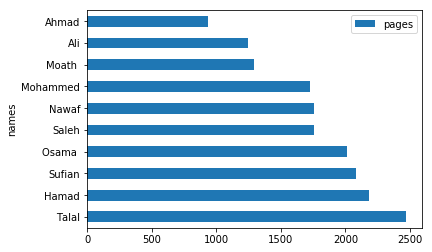

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

a = memberpages() 
#at this cell we are going to make a gragh for the pages  read by evrey member

i=1
k=0
j=0
path = "C:\\Users\\hp\\Desktop\\memberpages.xlsx" 
excel_workbook1 = xlsxwriter.Workbook(path)
excel_worksheet1 = excel_workbook1.add_worksheet()
excel_worksheet1.write(0,0,"names") #X,Y,CELL
excel_worksheet1.write(0,1,"pages")
while(i<=len(a)):
    while(j<=1):
        excel_worksheet1.write(i,j,a[k][j])
        
        j+=1
        
    i+=1
    k+=1
    j=0
excel_workbook1.close()

path = "C:\\Users\\hp\\Desktop\\memberpages.xlsx" 
my_sheet = 'Sheet1'
df = pd.read_excel(path, index_col=0 )
df.head()
df.plot(kind="barh")


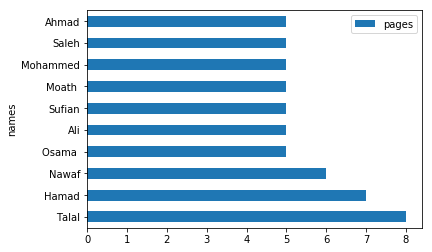

In [12]:

a = memberBooks()
#at this cell we are going to make a gragh for the books read by evrey member

i=1
k=0
j=0
path = "C:\\Users\\hp\\Desktop\\memberbooks.xlsx" 
excel_workbook1 = xlsxwriter.Workbook(path)
excel_worksheet1 = excel_workbook1.add_worksheet()
excel_worksheet1.write(0,0,"names") #X,Y,CELL
excel_worksheet1.write(0,1,"pages")
while(i<=len(a)):
    while(j<=1):
        excel_worksheet1.write(i,j,a[k][j])
        
        j+=1
        
    i+=1
    k+=1
    j=0
excel_workbook1.close()

 
my_sheet = 'Sheet1'
df = pd.read_excel(path, index_col=0 )
df.head()
df.plot(kind="barh")
